<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TFDS/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFDS

In this notebook we will take a look at the simple Hello World scenario of TensorFlow Datasets (TFDS). We'll use TFDS to perform the extract, transform, and load processes for the MNIST dataset.

### Setup

We'll start by importing TensorFlow, TensorFlow Datasets, and Matplotlib.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import warnings
warnings.filterwarnings('ignore')

import numpy as np
np.random.seed(42)

import pandas as pd
import json

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
sns.set(font='DejaVu Sans')

import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.get_logger().setLevel('ERROR')

import tensorflow_datasets as tfds

print("\u2022 Using TensorFlow Version:", tf.__version__)

• Using TensorFlow Version: 2.12.0


## Extract - Transform - Load (ETL)

Now we'll run the **ETL** code. First, to perform the **Extract** process we use `tfts.load`. This handles everything from downloading the raw data to parsing and splitting it, giving us a dataset. Next, we perform the **Transform** process. In this simple example, our transform process will just consist of shuffling the dataset. Finally, we **Load** one record by using the `take(1)` method. In this case, each record consists of an image and its corresponding label. After loading the record we proceed to plot the image and print its corresponding label. 

In [ ]:
# Construct a tf.data.Dataset by downloading and extracting
# Extract
dataset = tfds.load(name="mnist", split='train')
# Transform
dataset = dataset.shuffle(NUM_SAMPLES) # buffer size
dataset = dataset.repeat(NUM_EPOCHS)
dataset = dataset.map(lambda x: ...)
dataset = dataset.batch(BATCH_SIZE)
# Load
iterator = dataset.take(10) # To fetch 10 samples from the dataset
for data in iterator:
    # Acess data and use it

In [2]:
print(tfds.list_builders()[:10])

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence']


In [2]:
# Construct a tf.data.Dataset from MNIST
dataset = tfds.load(name="mnist", split='train')
# Inspecting shapes and datatypes
print(dataset)

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [4]:
# Checking if the dataset is an instance of tf.data.Dataset
assert isinstance(dataset, tf.data.Dataset)

In [10]:
mnist, info = tfds.load(name="mnist", with_info=True)
print(info)
print("Data dir: ", info.data_dir)
print("Image features: ", info.features['image'])
print("Label features: ", info.features['label'])
print("Number of training examples ", \
    info.splits['train'].num_examples)
print("Number of test examples ", \
    info.splits['test'].num_examples)

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/home/meng/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)
Data dir

In [6]:
dataset = tfds.load(name="mnist", as_supervised=True)
# Inspecting shapes of a batch
for image, label in dataset['train'].take(1):
    print(image.shape, label.shape)

(28, 28, 1) ()


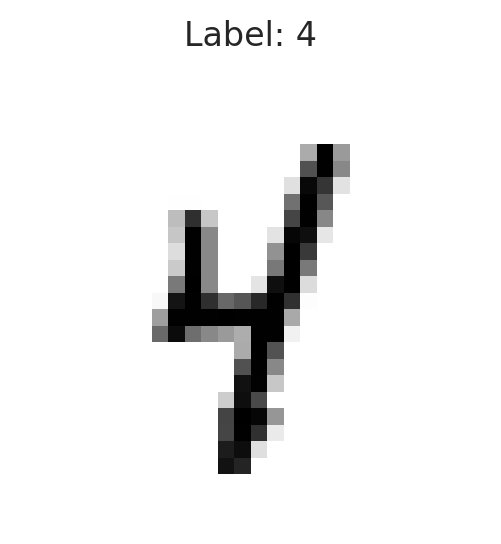

In [7]:
# EXTRACT
dataset = tfds.load(name="mnist", split='train')

# TRANSFORM
dataset.shuffle(100)

# LOAD
for data in dataset.take(1):
    image = data["image"].numpy().squeeze()
    label = data["label"].numpy()
    
    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

### DatasetBuilder

In [2]:
# Pick dataset
mnist_builder = tfds.builder(name="mnist")
# Download
mnist_builder.download_and_prepare()
# Extract dataset
mnist_builder.as_dataset(split='train')

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

## Fashion MNIST

In [3]:
(train_images, train_labels), (test_images, test_labels) = \
    tfds.as_numpy(dataset=tfds.load(name="fashion_mnist",
        split=['train', 'test'], batch_size=-1, as_supervised=True))

print(f"x_train shape: {train_images.shape},"\
    f"y_train shape: {train_labels.shape}")
print(f"x_test shape: {test_images.shape},"\
    f"y_test shape: {test_labels.shape}")

x_train shape: (60000, 28, 28, 1),y_train shape: (60000,)
x_test shape: (10000, 28, 28, 1),y_test shape: (10000,)


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(units=128,
        activation=tf.keras.activations.relu),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=10,
        activation=tf.keras.activations.softmax)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

history = model.fit(x=train_images, y=train_labels,
    validation_split=0.1,
    epochs=5, batch_size=64, verbose=0)

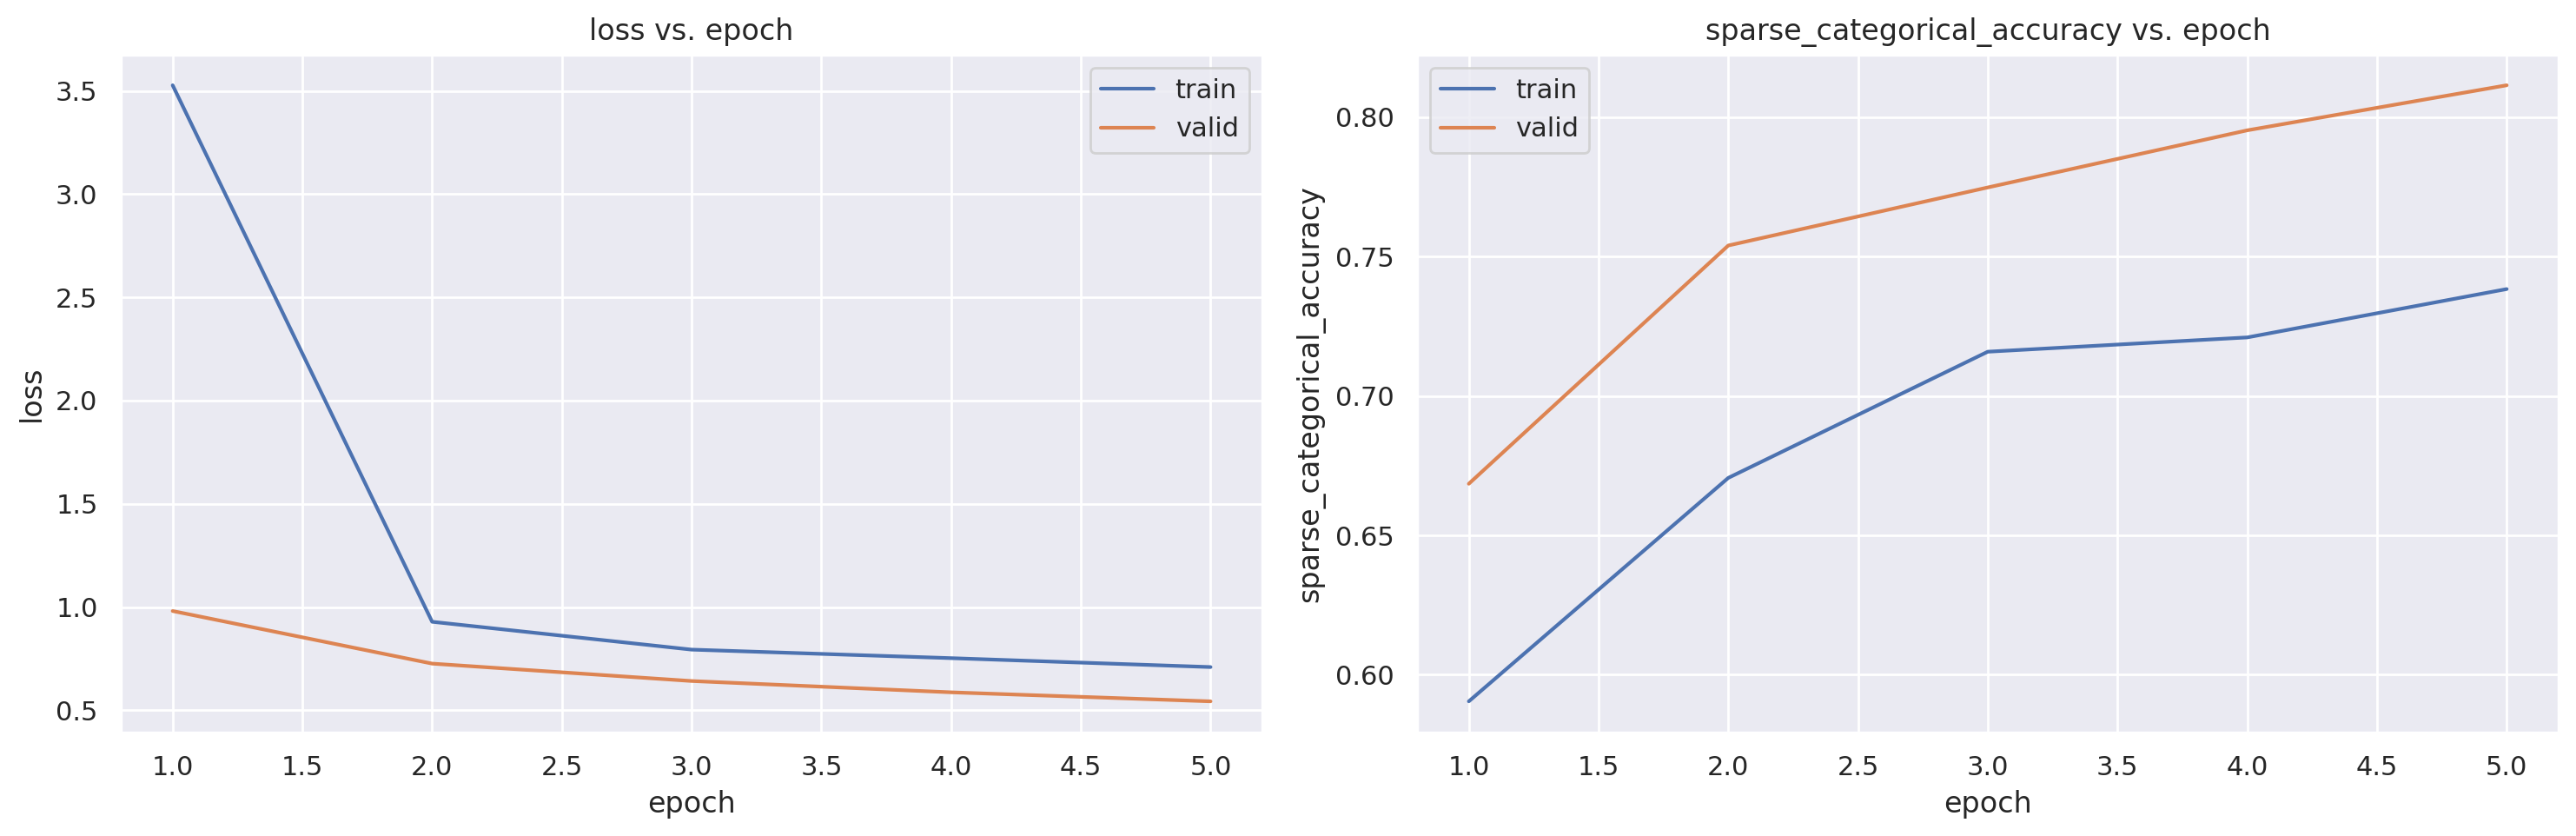

test loss: 0.58, test accuracy: 0.80


In [5]:
df_history = pd.DataFrame(data=history.history, index=history.epoch)
metrics = ['loss', 'sparse_categorical_accuracy']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, metrics):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    try:
        sns.lineplot(ax=ax, data=df_history,
            x=df_history.index+1, y=f'val_{metric}', label='valid')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f"{metric} vs. epoch")
fig.tight_layout()
plt.show()

test_loss, test_acc = model.evaluate(x=test_images, y=test_labels,
    verbose=0)
print(f"test loss: {test_loss:.2f}, test accuracy: {test_acc:.2f}")

## Horses or Humans

In [2]:
train_ds = tfds.load(name='horses_or_humans', split='train',
    as_supervised=True)
print("Number of train samples: ", len(list(train_ds)))
print(train_ds.element_spec)
train_batches = train_ds.shuffle(100).batch(32)

val_ds = tfds.load(name='horses_or_humans', split='test', 
    as_supervised=True)
print("Number of test samples:", len(list(val_ds)))
print(val_ds.element_spec)
validation_batches = val_ds.batch(32)

Number of train samples:  1027
(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
Number of test samples: 256
(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
        activation=tf.keras.activations.relu,
        input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
        activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
        activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
        activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
        activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512,
        activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1,
        activation=tf.keras.activations.sigmoid)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

history = model.fit(x=train_batches, 
    validation_data=validation_batches, validation_steps=1,
    epochs=10, verbose=0)

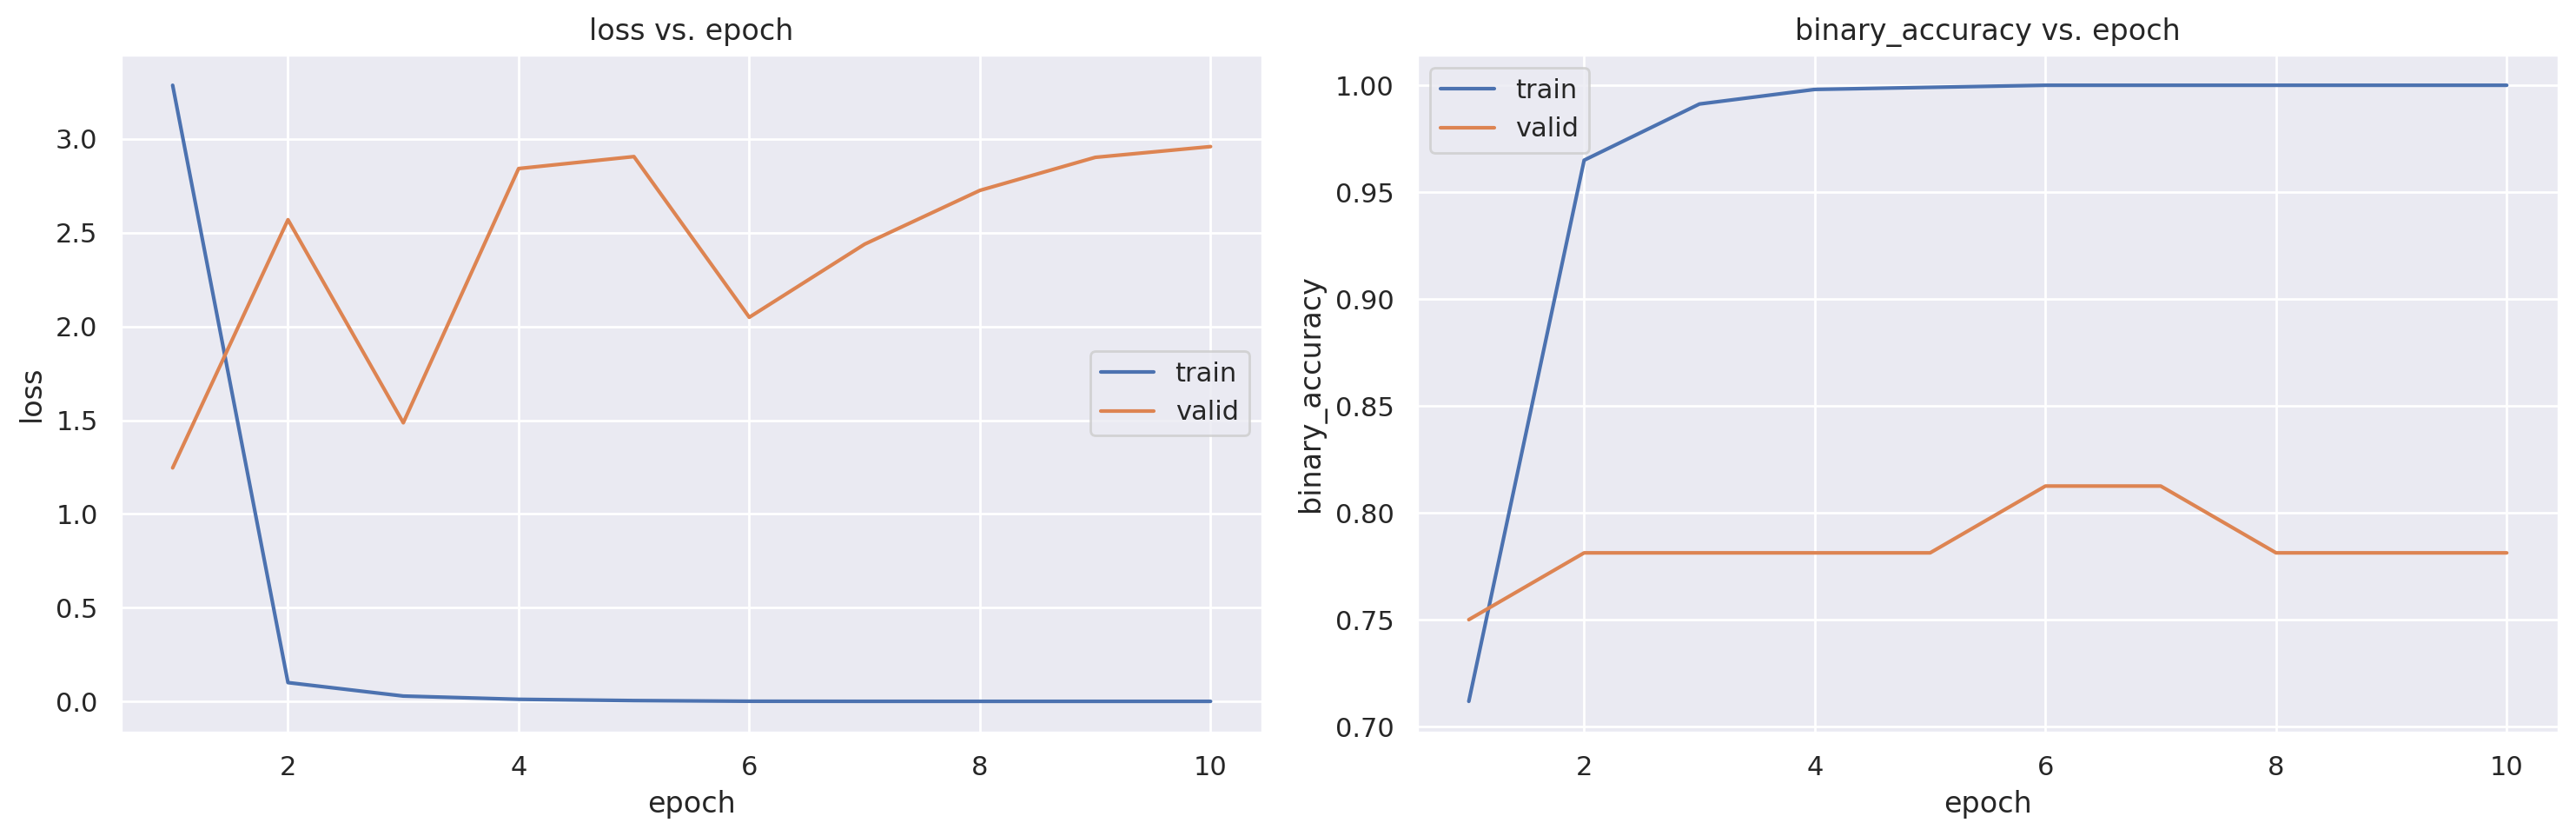

In [5]:
df_history = pd.DataFrame(data=history.history, index=history.epoch)
metrics = ['loss', 'binary_accuracy']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, metric in zip(axes, metrics):
    sns.lineplot(ax=ax, data=df_history,
        x=df_history.index+1, y=metric, label='train')
    try:
        sns.lineplot(ax=ax, data=df_history,
            x=df_history.index+1, y=f'val_{metric}', label='valid')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel('epoch')
    ax.set_ylabel(f'{metric}')
    ax.set_title(f'{metric} vs. epoch')
fig.tight_layout()
plt.show()

## Rock, Paper and Scissors

### Step 1 - One Hot Encoding

Remember to one hot encode the labels as you have 3 classes - Rock, Paper and Scissors. You can use Tensorflow's one_hot function ([`tf.one_hot`](https://www.tensorflow.org/api_docs/python/tf/one_hot)) to convert categorical variables to one-hot vectors.

Useful parameters -
1. `indices` - A tensor containing all indices
2. `depth` - A scalar defining the depth of the one hot dimension.

In [ ]:
# Encoding the labels using function for one-hot encoding

def one_hot_encoding(feature, label):
    """
    Encode the labels to one-hot using tf.one_hot with depth equal to total
    number of classes here which are rock, paper and scissors
    """

    one_hot = tf.one_hot(indices=label, depth=3)
    return feature, one_hot

# Testing the function
_, one_hot = one_hot_encoding(
    feature=["a", "b", "c", "a"],
    label=[1, 2, 3, 1])
print(one_hot)

tf.Tensor(
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 1. 0.]], shape=(4, 3), dtype=float32)
